Создать и заполнить граф, нарисовать

Welcome to JupyROOT 6.18/04


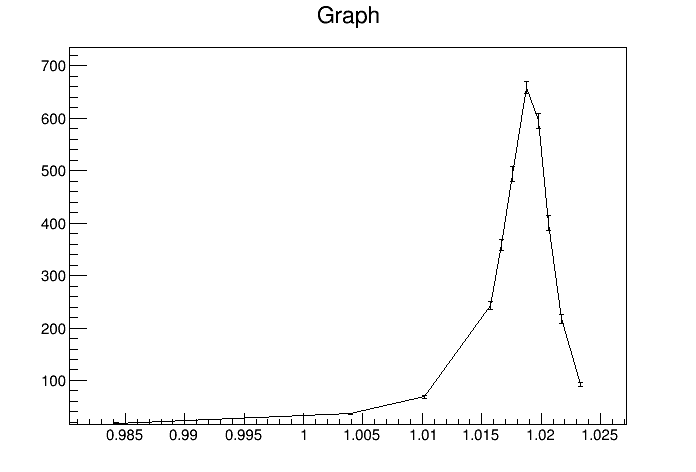

In [1]:
import ROOT
canvas = ROOT.TCanvas()

graph = ROOT.TGraphErrors("variant1.txt")
graph.Draw()
canvas.Draw()


Прикинуть из графика начальные параметры (высота пика A, положение M, ширина на полувысоте Γ)

In [2]:
A0 = 660
M0 = 1.017
G0 = 0.004

Подогнать функцией, получить параметры их ошибки, xi^2/Ndf, вероятность

In [3]:
def func(xx, pp):
    A = pp[0]
    M = pp[1]
    G = pp[2]
    E = xx[0]
    return A * ((G/2)**2) / ((E-M)**2 + (G/2)**2)

func = ROOT.TF1("func", func, 0.9, 1.1, 3)

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

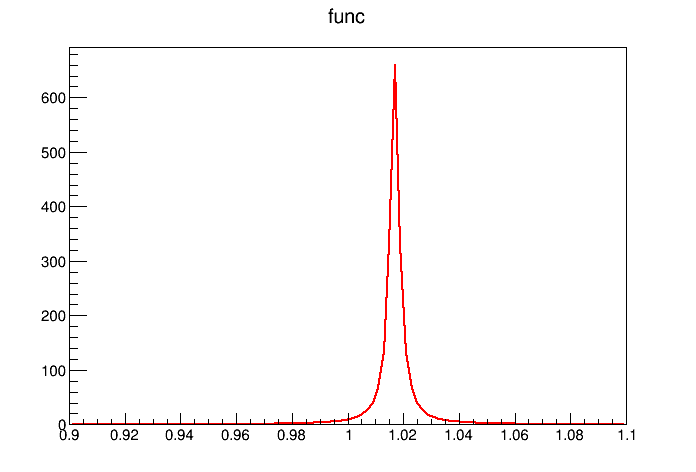

In [4]:
func.Draw()
canvas.Draw()

In [5]:
fit_res = graph.Fit(func, "S")
#S for result for saving result in TFitResultPtr

 FCN=801.248 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=3.50126e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.44647e+02   9.91980e+00   8.26193e-02   2.67628e-07
   2  p1           1.01858e+00   2.90706e-05   4.85697e-07   1.88263e-01
   3  p2           4.69357e-03   8.08949e-05   6.60487e-07   1.23597e-01


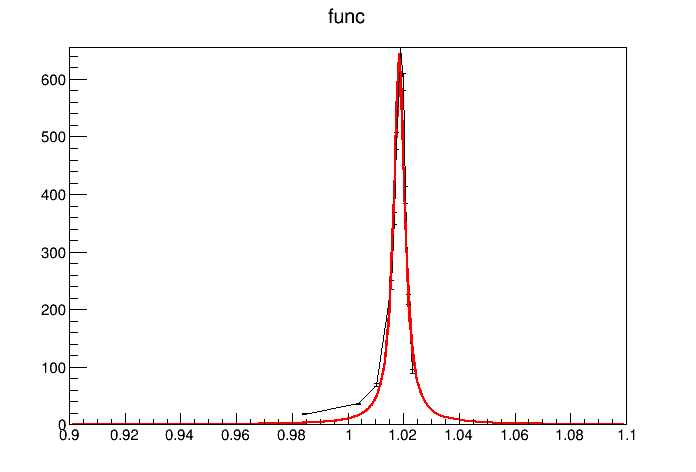

In [6]:
graph.Draw()
canvas.Draw()

Параметры, ошибки, chi^2/ndf, вероятность:

Double_t Prob(Double_t chi2, Int_t ndf)

Computation of the probability for a certain Chi-squared (chi2) and number of degrees of freedom (ndf). Represents the probability that the observed Chi-squared for a correct model should be less than the value chi2.

In [7]:
print("A = ", fit_res.Parameter(0), "\nA error = ", fit_res.ParError(0))

A =  644.6474110686808 
A error =  9.919798939754054


In [8]:
print("M =", fit_res.Parameter(1), "\nM error =", fit_res.ParError(1))

M = 1.0185810602505119 
M error = 2.907063149682397e-05


In [9]:
print("G =", fit_res.Parameter(2), "\nG error =", fit_res.ParError(2))

G = 0.00469356552350315 
G error = 8.089486300056363e-05


In [10]:
print("Chi^2/ndf = ", fit_res.Chi2()/fit_res.Ndf())

Chi^2/ndf =  100.15596506300975


In [11]:
probability = ROOT.TMath.Prob(fit_res.Chi2(), fit_res.Ndf())
print("P =", probability) # Probability that chi^2 in this model should be less than the value chi2.

P = 1.1081116793635603e-167


по эффективности: создать гистограммы для A, M, Γ, в цикле (1-1000):

In [12]:
A_eff = ROOT.TH1F("A_eff", "A_eff", 200, 620, 670)
M_eff = ROOT.TH1F("M_eff", "M_eff", 200, 1.018, 1.019)
G_eff = ROOT.TH1F("G_eff", "G_eff", 200, 0.0045, 0.0049)

xs = graph.GetX()
ys = graph.GetY()

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

for j in range(1000): # по эффективности: создать гистограммы для A, M, Γ, в цикле (1-1000):
    ef_graph = ROOT.TGraphErrors() #  создать новый граф
    for i in range(graph.GetN()):
        err = ys[i]*0.01*xs[i]/1.02 # заполнить E’ -> E ; s’ -> RandomNorm(s, ошибка)
        s = ROOT.gRandom.Gaus(0, err)
        ef_graph.SetPoint(i, xs[i], s + ys[i])
        ef_graph.SetPointError(i, graph.GetErrorX(i), graph.GetErrorY(i))
    fit = ef_graph.Fit(func, "SQ")
    A_eff.Fill(fit.Parameter(0))
    M_eff.Fill(fit.Parameter(1))
    G_eff.Fill(fit.Parameter(2))

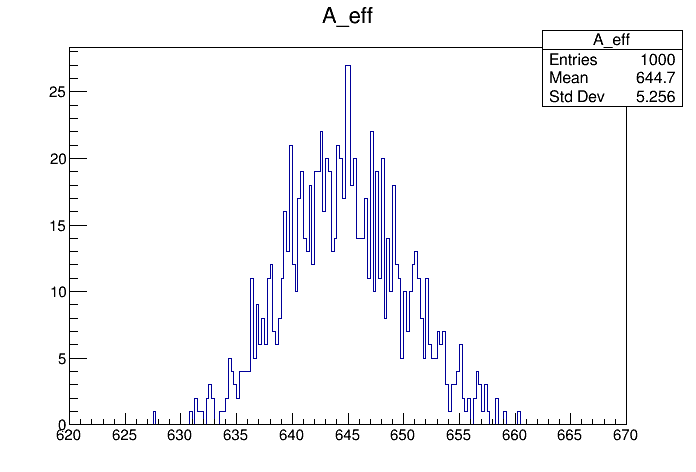

In [13]:
canvas.Clear()
A_eff.Draw()
canvas.Draw()

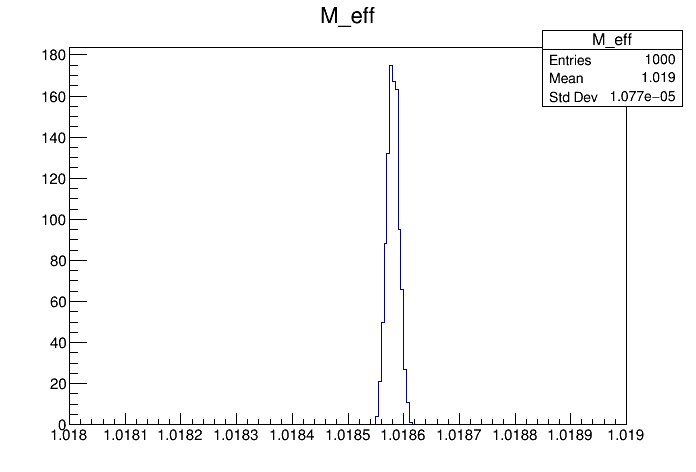

In [14]:
M_eff.Draw()
canvas.Draw()

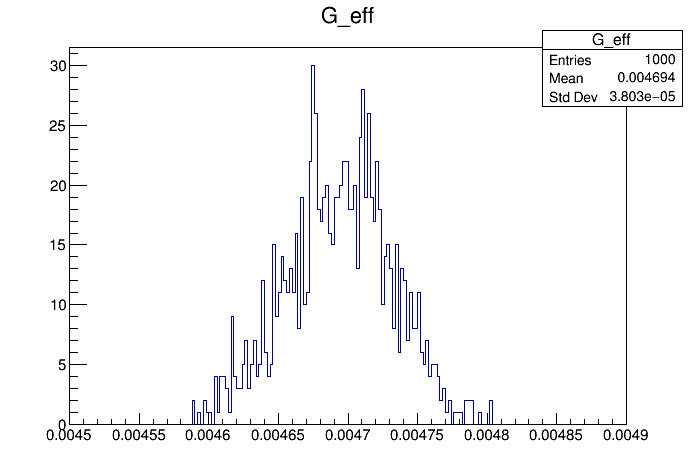

In [15]:
G_eff.Draw()
canvas.Draw()

In [16]:
# получить вклады в ошибки
print("A:", A_eff.GetRMS())
print("M:", M_eff.GetRMS())
print("G:", G_eff.GetRMS())

A: 5.25642173771805
M: 1.077323038599421e-05
G: 3.803066842223998e-05


по энергии: создать гистограммы, в цикле

In [17]:
A_energy = ROOT.TH1F("A_energy", "A_energy", 200, 644.6, 644.7)
M_energy = ROOT.TH1F("M_energy", "M_energy", 200, 1.0175, 1.0195)
G_energy = ROOT.TH1F("G_energy", "G_energy", 200, 0.004693, 0.004694)

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

for j in range(1000): # по энергии: создать гистограммы, в цикле
    new_graph = ROOT.TGraphErrors() # создать новый граф
    dE = ROOT.gRandom.Gaus(0, 0.0001) #  0.1Mev смещение dE = RandomNorm(0, ошибка в ГэВ)
    for i in range(graph.GetN()): # заполнить E’ -> E+dE; s’ -> s
        new_graph.SetPoint(i, xs[i] + dE, ys[i])
        new_graph.SetPointError(i, graph.GetErrorX(i), graph.GetErrorY(i))
    fit = new_graph.Fit(func, "SQ") # подогнать, скинуть значения
    A_energy.Fill(fit.Parameter(0))
    M_energy.Fill(fit.Parameter(1))
    G_energy.Fill(fit.Parameter(2))

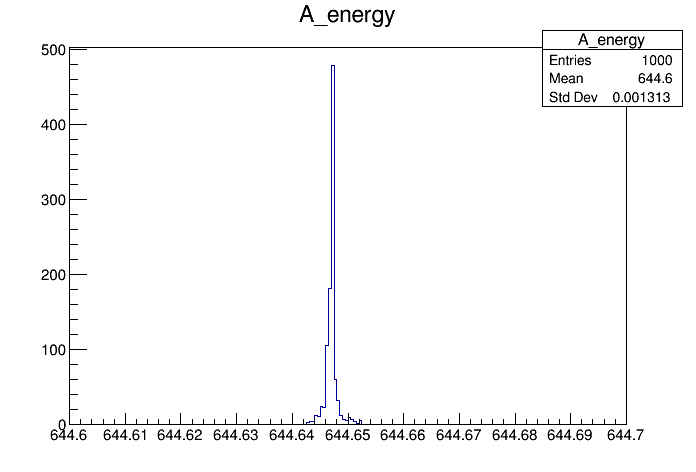

In [18]:
canvas.Clear()
A_energy.Draw()
canvas.Draw()

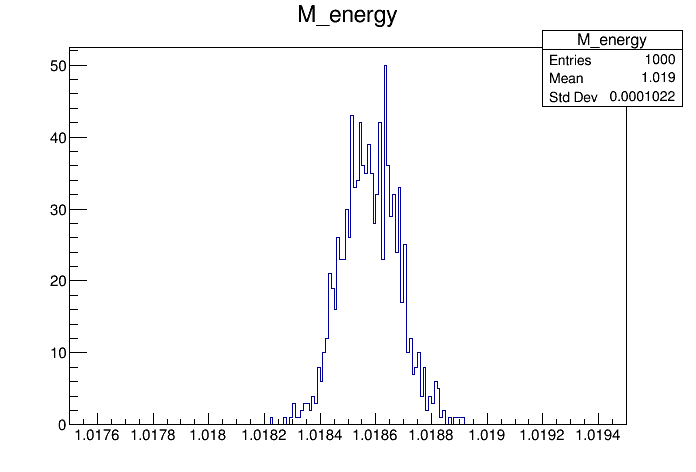

In [19]:
M_energy.Draw()
canvas.Draw()

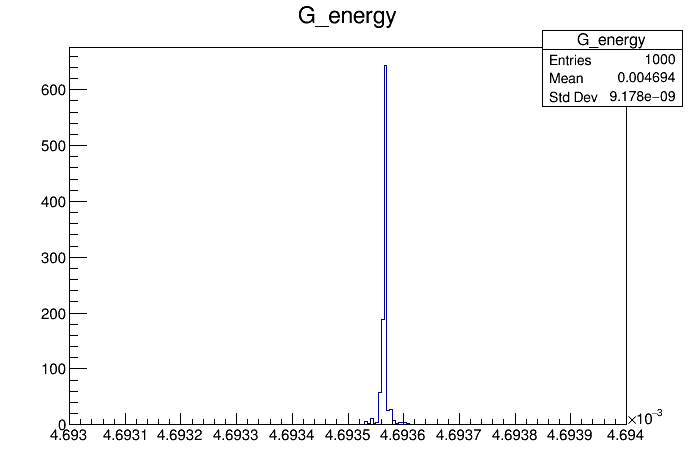

In [20]:
G_energy.Draw()
canvas.Draw()

In [21]:
# получить вклады в ошибки
print("A:", A_energy.GetRMS()/fit_res.ParError(0))
print("M:", M_energy.GetRMS()/fit_res.ParError(1))
print("G:", G_energy.GetRMS()/fit_res.ParError(2))

A: 0.0001323692359506793
M: 3.5170099905763252
G: 0.00011346050236412055


объяснить, какой вклад ожидался, сравнить с полученным

In [22]:
#3
from math import sqrt
dE = 0.0001

sigma = sum(xs)/len(xs)
EminusM = abs(fit_res.ParError(1))

dA_E = 8 * sigma * EminusM / ((G0)**2) * dE
dG_E = 2 * dE / sqrt(A0/sigma-1)
dM_E = dE

In [23]:
print ("dA from computations: ", dA_E, "\tdA from hist: ", A_energy.GetRMS())
print ("dG from computations: ", dG_E, "\tdG from hist: ", G_energy.GetRMS())
print ("dM from computations: ", dM_E, "\tdM from hist: ", M_energy.GetRMS())

dA from computations:  0.0014736801652531792 	dA from hist:  0.0013130762064396027
dG from computations:  7.844788513303234e-06 	dG from hist:  9.178371794720658e-09
dM from computations:  0.0001 	dM from hist:  0.0001022417014066927


In [26]:
dA_F = 0
dG_F = 0
dM_F = 0

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

A = fit_res.ParError(0)
M = fit_res.ParError(1)
G = fit_res.ParError(2)

#Посчитаем avg(dsigma)= 0,01/1.02 avg(E*sigma)


cdA = 0
cdG = 0
cdM = 0
dsigma_avg = 0
for i in range(graph.GetN()):
    dsigma_avg += (0.01/1.02*xs[i]*ys[i])**2
    cdA += ((G/2)**2 + 1)**2 / ((xs[i]-M)**2)**2
    cdG += (ys[i]**2)**2 / (A * abs(xs[i] - M))**2 * abs(pow(A/ys[i] - 1, 3))
    cdM += 16*(ys[i]**2)/ (A*G)**2 * abs(A/ys[i]- 1)
    
dsigma_avg = sqrt(dsigma_avg/ graph.GetN())
cdG = sqrt(cdG/ graph.GetN())
cdA = sqrt(cdA/ graph.GetN())
cdM = sqrt(cdM/ graph.GetN())

dA_F = dsigma_avg/cdA
dM_F = dsigma_avg/cdM
dG_F = dsigma_avg/cdG

In [27]:
print ("dA from computations: ", dA_F, "\t dA from hist: ", A_eff.GetRMS())
print ("dM from computations: ", dM_F, "\t dM from hist: ", M_eff.GetRMS())
print ("dG from computations: ", dG_F, "\t dG from hist: ", G_eff.GetRMS())

dA from computations:  3.714754835000954 	 dA from hist:  5.25642173771805
dM from computations:  2.026083847773811e-06 	 dM from hist:  1.077323038599421e-05
dG from computations:  0.00019185434311116408 	 dG from hist:  3.803066842223998e-05
